# IE406 Machine Learning 
## Lab Assignment 7: K-Means

---

### Devdeep Shetrajiwala : 202001150

### Divya Patel : 202001420


In [101]:
from math import *
import math as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
sns.set( style="whitegrid")
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

## Question 1

Use the k-means algorithm and Euclidean distance to cluster the following examples into 3 clusters: $A_{1}=(2,10)$, $A_{2}=(2,5)$, $A_{3}=(8,4)$, $A_{4}=(5,8)$, $A_{5}=(7,5)$, $A_{6}=(6,4)$, $A_{7}=(1,2)$, $A_{8}=(4,9)$

1. Plot the distance matrix based on the Euclidean distance.


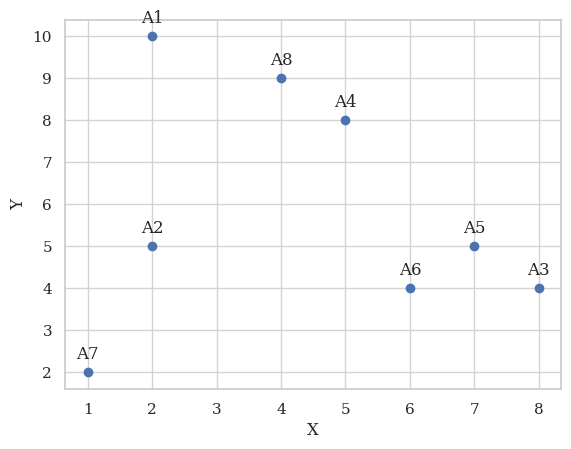

In [102]:
points = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']

plt.scatter(points[:,0], points[:,1])

for i, label in enumerate(labels):
    plt.annotate(label, (points[i,0], points[i,1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(color='lightgrey',linestyle='-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [103]:
distances = np.zeros((8,8))

for i in range(8):
    for j in range(8): 
        distances[i][j] = np.linalg.norm(points[i]-points[j])

print(np.round_(distances, decimals=3))

[[0.    5.    8.485 3.606 7.071 7.211 8.062 2.236]
 [5.    0.    6.083 4.243 5.    4.123 3.162 4.472]
 [8.485 6.083 0.    5.    1.414 2.    7.28  6.403]
 [3.606 4.243 5.    0.    3.606 4.123 7.211 1.414]
 [7.071 5.    1.414 3.606 0.    1.414 6.708 5.   ]
 [7.211 4.123 2.    4.123 1.414 0.    5.385 5.385]
 [8.062 3.162 7.28  7.211 6.708 5.385 0.    7.616]
 [2.236 4.472 6.403 1.414 5.    5.385 7.616 0.   ]]


2. Suppose that the initial seeds (centers of each cluster) are $A_{1}$, $A_{4}$, and $A_{7}$. Run the k-means algorithm for 1 epoch only. At the end of this epoch show:
    1. The new clusters (i.e., the examples belonging to each cluster)
    2. The centers of the new clusters
    3. Draw a 10 by 10 space with all the 8 points and show the clusters after the first epoch and the new centroids.
    4. How many more iterations are needed to converge? Draw the result for each epoch.


In [104]:
mean1 = points[0]
mean2 = points[3]
mean3 = points[6]

cluster_id = np.zeros(8)

for i in range(8):
    d1 = np.linalg.norm(points[i]-mean1)
    d2 = np.linalg.norm(points[i]-mean2)
    d3 = np.linalg.norm(points[i]-mean3)
    cluster_id[i] = np.argmin([d1, d2, d3])
    
print(cluster_id)

[0. 2. 1. 1. 1. 1. 2. 1.]


#### Epoch 1 iteration

In [105]:
k = 3
mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

print("Mean1: ", mean1,", Mean2: ", mean2,", Mean3: ", mean3)

Mean1:  [ 2. 10.] , Mean2:  [6. 6.] , Mean3:  [1.5 3.5]


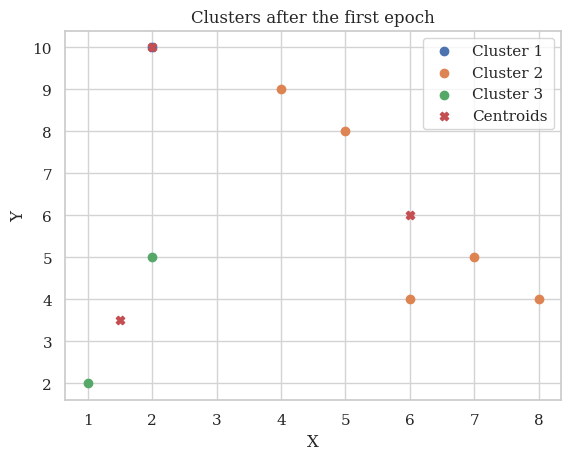

In [106]:
# Plot clusters with different colors
plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1], label='Cluster 1')
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1], label='Cluster 2')
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1], label='Cluster 3')

# Plot the new centroids
Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X', label='Centroids')

# Add grid, legend, labels and title
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters after the first epoch')
plt.grid(color='lightgrey',linestyle='-')
plt.show()


#### Epoch 2 iteration

[0. 2. 1. 1. 1. 1. 2. 0.]


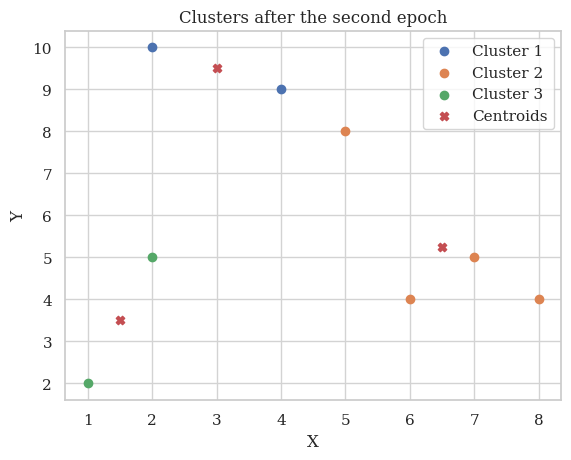

In [107]:
cluster_id = np.zeros(8)

for i in range(8):
    d1 = np.linalg.norm(points[i]-mean1)
    d2 = np.linalg.norm(points[i]-mean2)
    d3 = np.linalg.norm(points[i]-mean3)
    cluster_id[i] = np.argmin([d1, d2, d3])
    
print(cluster_id)

mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1],label = 'Cluster 1')
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1], label = 'Cluster 2')
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1], label = 'Cluster 3')

# Plot the new centroids
Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X', label='Centroids')

# Add grid, legend, labels and title
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters after the second epoch')
plt.grid(color='lightgrey',linestyle='-')
plt.show()

#### Epoch 3 iteration

[0. 2. 1. 0. 1. 1. 2. 0.]


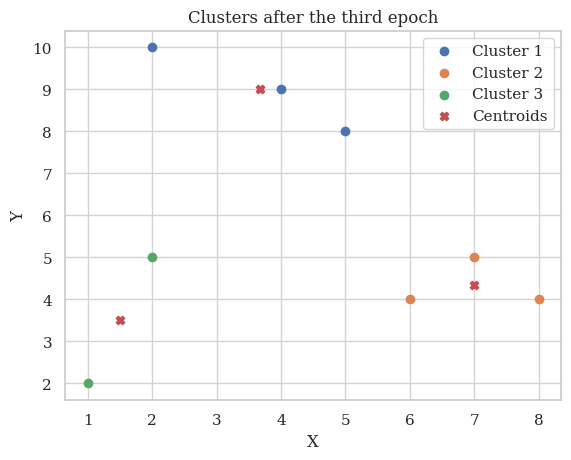

In [108]:

cluster_id = np.zeros(8)

for i in range(8):
    d1 = np.linalg.norm(points[i]-mean1)
    d2 = np.linalg.norm(points[i]-mean2)
    d3 = np.linalg.norm(points[i]-mean3)
    cluster_id[i] = np.argmin([d1, d2, d3])
    
print(cluster_id)

mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1], label = 'Cluster 1')
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1], label = 'Cluster 2')
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1], label = 'Cluster 3')

Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X', label='Centroids')

plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters after the third epoch')
plt.grid(color='lightgrey',linestyle='-')
plt.show()

#### Epoch 4 iteration

[0. 2. 1. 0. 1. 1. 2. 0.]


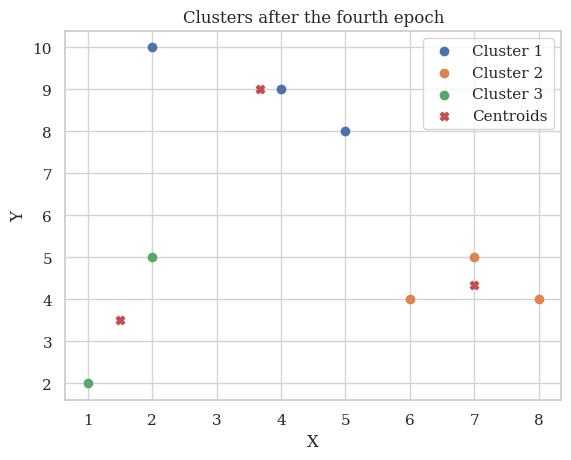

In [109]:

cluster_id = np.zeros(8)

for i in range(8):
    d1 = np.linalg.norm(points[i]-mean1)
    d2 = np.linalg.norm(points[i]-mean2)
    d3 = np.linalg.norm(points[i]-mean3)
    cluster_id[i] = np.argmin([d1, d2, d3])
    
print(cluster_id)

mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1], label = 'Cluster 1')
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1], label = 'Cluster 2')
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1], label = 'Cluster 3')

Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X', label='Centroids')

plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters after the fourth epoch')
plt.grid(color='lightgrey',linestyle='-')
plt.show()

#### Epoch 5 iteration

[0. 2. 1. 0. 1. 1. 2. 0.]


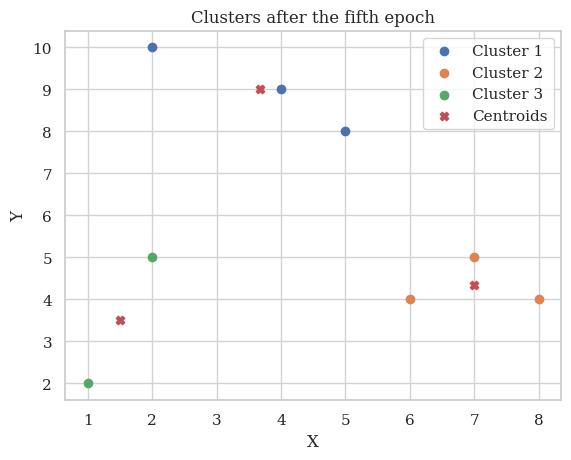

In [110]:

cluster_id = np.zeros(8)

for i in range(8):
    d1 = np.linalg.norm(points[i]-mean1)
    d2 = np.linalg.norm(points[i]-mean2)
    d3 = np.linalg.norm(points[i]-mean3)
    cluster_id[i] = np.argmin([d1, d2, d3])
    
print(cluster_id)

mean1 = np.average(points[np.where(cluster_id==0)], axis=0) 
mean2 = np.average(points[np.where(cluster_id==1)], axis=0) 
mean3 = np.average(points[np.where(cluster_id==2)], axis=0) 

plt.scatter(points[np.where(cluster_id==0),0],points[np.where(cluster_id==0),1], label = 'Cluster 1')
plt.scatter(points[np.where(cluster_id==1),0],points[np.where(cluster_id==1),1], label = 'Cluster 2')
plt.scatter(points[np.where(cluster_id==2),0],points[np.where(cluster_id==2),1], label = 'Cluster 3')

Mean = np.vstack((np.vstack((mean1,mean2)),mean3))
plt.scatter(Mean[:,0],Mean[:,1],marker='X', label='Centroids')

plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters after the fifth epoch')
plt.grid(color='lightgrey',linestyle='-')
plt.show()

##### As there were no new changes after epoch 4 on checking epoch 5, we can conclude that the algorithm has converged. 


## Question 2

Implement k-means clustering algorithm. Use the two dataset files for the following: <br>
(1) Visualize the datasets.<br>
(2) Use random initial cluster centers and try the algorithm for different values for K (i.e. k=1,2,3...)<br>
(3) Visualize the cluster formation for each value of K for both the datasets.<br>
(4) Utilize the Elbow method to find out the optimal number of Clusters (i.e. K)<br>

In [111]:
df1 = pd.read_csv('kmeans_2a.csv', header=None)
df2 = pd.read_csv('kmeans_2b.csv')
X1, Y1 = df1[0].values, df1[1].values
X2, Y2 = df2['x1'].values, df2['x2'].values

Text(0.5, 1.0, 'Dataset 1')

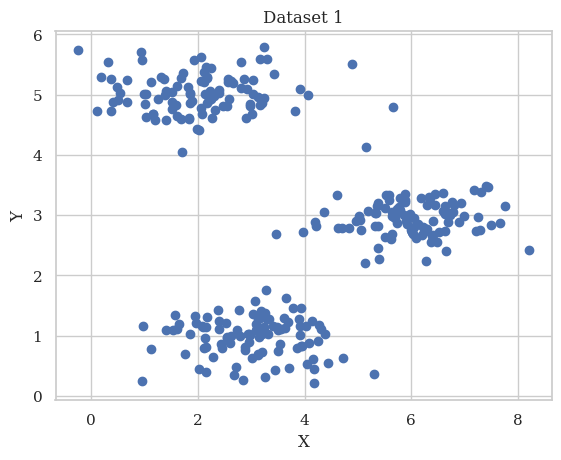

In [112]:
plt.scatter(X1,Y1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1')

Text(0.5, 1.0, 'Dataset 2')

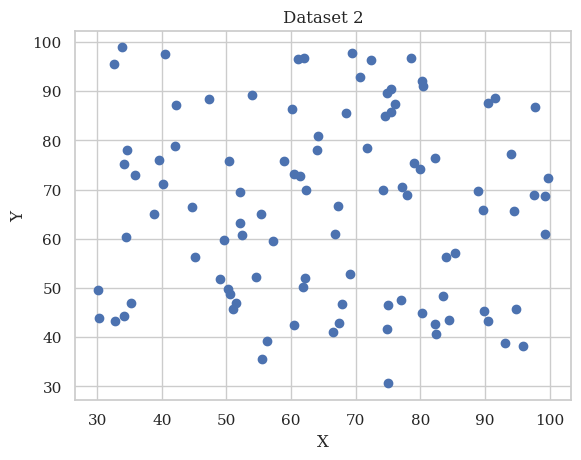

In [113]:
plt.scatter(X2,Y2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2')

# 4 clusters along with visualisation

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Dataset 2')

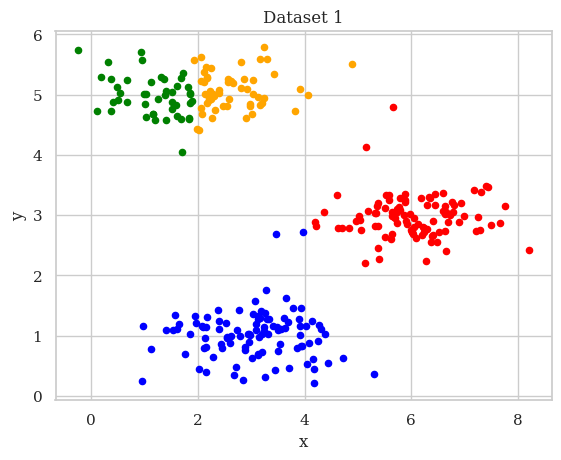

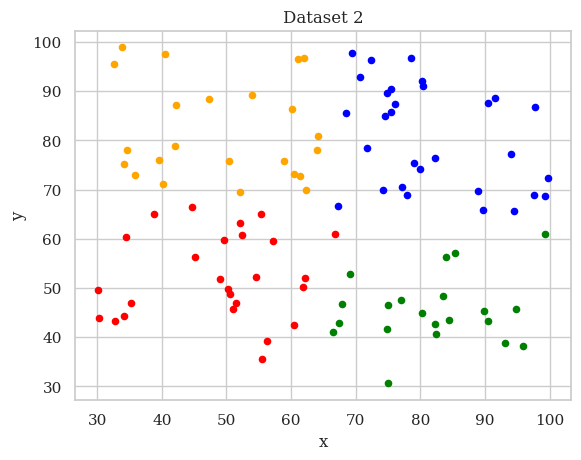

In [114]:
from sklearn.cluster import KMeans

# Convert dataframes to numpy arrays
data1 = df1.to_numpy()
data2 = df2.to_numpy()[:,:2]

# Fit KMeans model
kmeans_1 = KMeans(n_clusters=4).fit(data1)
kmeans_2 = KMeans(n_clusters=4).fit(data2)

# Predict labels
label_1 = kmeans_1.labels_
label_2 = kmeans_2.labels_

# Insert labels into data
new_data1 = np.insert(data1, 2, label_1, axis=1)
new_data2 = np.insert(data2, 2, label_2, axis=1)

# Create new dataframes
df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])

# Plot Dataset 1
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='red')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='green', ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='blue', ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='orange', ax=ax)
ax.set_title('Dataset 1')

# Plot Dataset 2
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange', ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red', ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue', ax=ax2)
ax2.set_title('Dataset 2')


# 3 clusters along with visualisation

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Dataset 2')

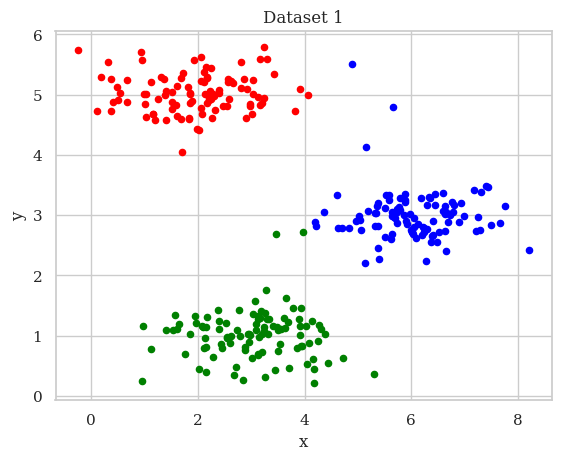

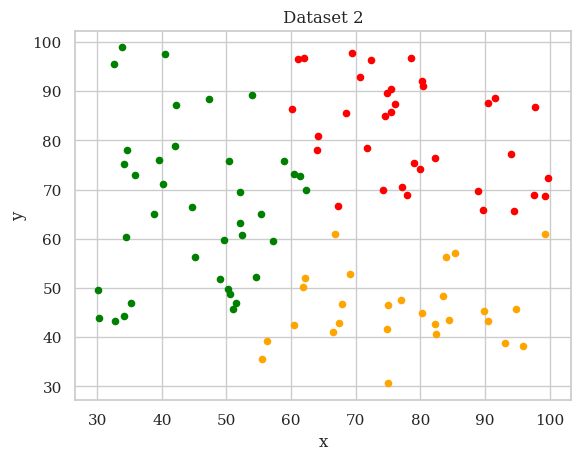

In [115]:
kmeans_1 = KMeans(n_clusters=3).fit(data1)
kmeans_2 = KMeans(n_clusters=3).fit(data2)

label_1 = kmeans_1.labels_
label_2 = kmeans_2.labels_

new_data1 = np.insert(data1, 2, label_1, axis=1)
new_data2 = np.insert(data2, 2, label_2, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])

# Plot Dataset 1
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='red')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='green', ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='blue', ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='orange', ax=ax)
ax.set_title('Dataset 1')

# Plot Dataset 2
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange', ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red', ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue', ax=ax2)
ax2.set_title('Dataset 2')


# 2 clusters along with visualisation

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Dataset 2')

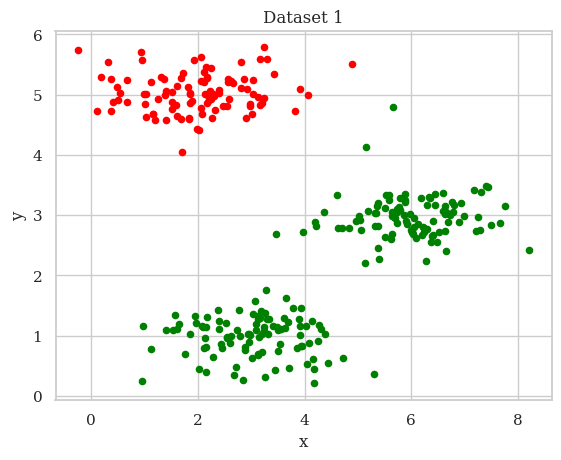

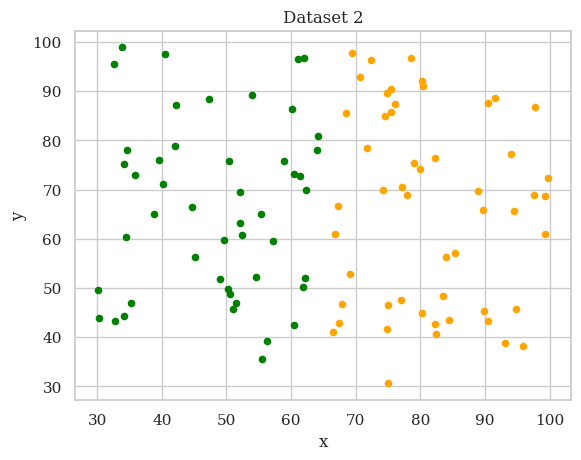

In [116]:
kmeans_1 = KMeans(n_clusters=2).fit(data1)
kmeans_2 = KMeans(n_clusters=2).fit(data2)

label_1 = kmeans_1.labels_
label_2 = kmeans_2.labels_

new_data1 = np.insert(data1, 2, label_1, axis=1)
new_data2 = np.insert(data2, 2, label_2, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])

# Plot Dataset 1
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='red')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='green', ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='blue', ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='orange', ax=ax)
ax.set_title('Dataset 1')

# Plot Dataset 2
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange', ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red', ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue', ax=ax2)
ax2.set_title('Dataset 2')


# 1 cluster along with visualisation

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Dataset 2')

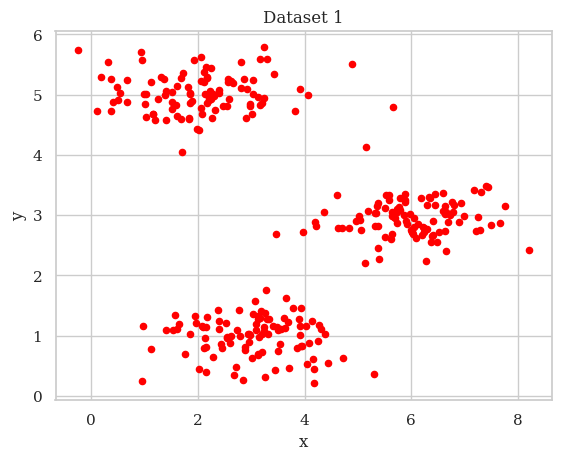

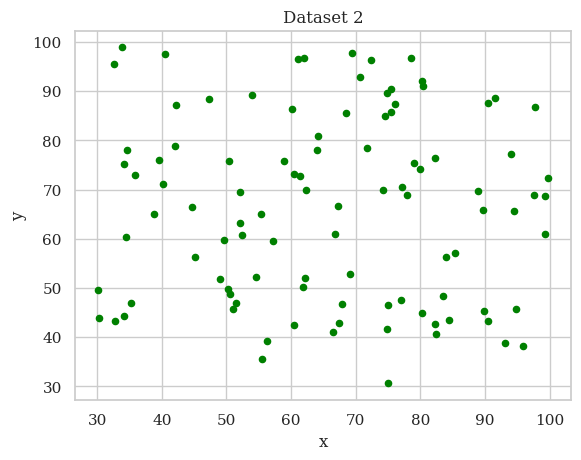

In [117]:
kmeans_1 = KMeans(n_clusters=1).fit(data1)
kmeans_2 = KMeans(n_clusters=1).fit(data2)

label_1 = kmeans_1.labels_
label_2 = kmeans_2.labels_

new_data1 = np.insert(data1, 2, label_1, axis=1)
new_data2 = np.insert(data2, 2, label_2, axis=1)

df_new1 = pd.DataFrame(new_data1, columns=['x', 'y', 'z'])
df_new2 = pd.DataFrame(new_data2, columns=['x', 'y', 'z'])

# Plot Dataset 1
ax = df_new1[df_new1.z == 0].plot.scatter(x='x', y='y', color='red')
df_new1[df_new1.z == 1].plot.scatter(x='x', y='y', color='green', ax=ax)
df_new1[df_new1.z == 2].plot.scatter(x='x', y='y', color='blue', ax=ax)
df_new1[df_new1.z == 3].plot.scatter(x='x', y='y', color='orange', ax=ax)
ax.set_title('Dataset 1')

# Plot Dataset 2
ax2 = df_new2[df_new2.z == 0].plot.scatter(x='x', y='y', color='green')
df_new2[df_new2.z == 1].plot.scatter(x='x', y='y', color='orange', ax=ax2)
df_new2[df_new2.z == 2].plot.scatter(x='x', y='y', color='red', ax=ax2)
df_new2[df_new2.z == 3].plot.scatter(x='x', y='y', color='blue', ax=ax2)
ax2.set_title('Dataset 2')


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

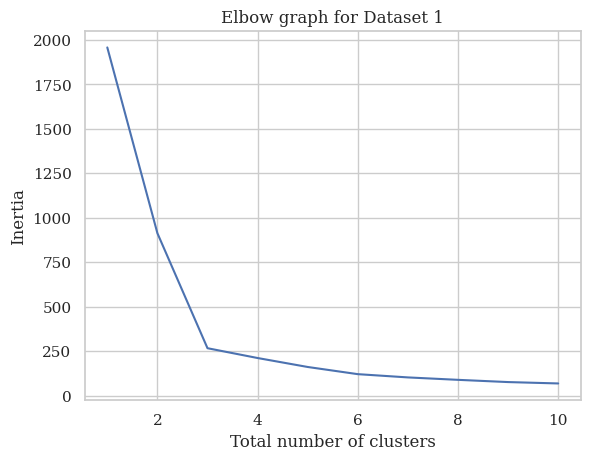

In [118]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.xlabel('Total number of clusters')
plt.ylabel('Inertia') 
plt.title('Elbow graph for Dataset 1')
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

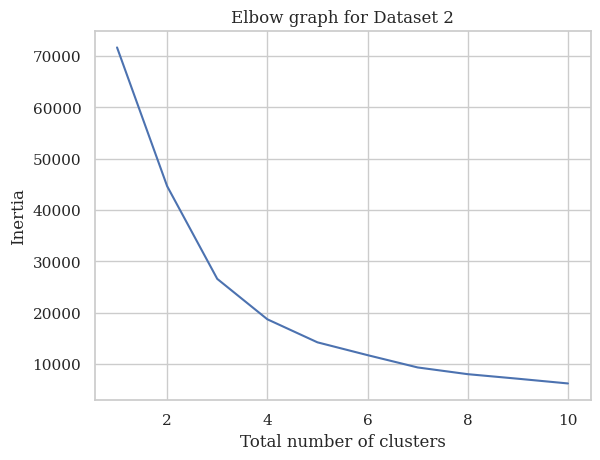

In [119]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.xlabel('Total number of clusters')
plt.ylabel('Inertia') 
plt.title('Elbow graph for Dataset 2')
plt.show()


#### Result

The resulting graphs of the cluster sets and the elbow graphs are shown as above.

#### Observation/Justification

For dataset 1, it is evident from the elbow graph that the optimal number of clusters is 3 as 3 is the inflection point for the first dataset.

For dataset 2, it is not clearly evident what number of clusters is optimal as the elbow graph is not very clear. However, we can see that the inflection point is at 3 and 4. So, we can say that the optimal number of clusters is 3 or 4.

## Question 3

In the given dataset, you have Customer_Id, Gender, Age, Annual Income, and Spending Score (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent). From this dataset, you need to calculate some patterns. Note down your observation points from the above pattern. (Follow the steps given above in Problem 2)

In [120]:
records=pd.read_csv('knn_p3.csv')
records.columns = ['id','sex','age','income','score']
label_encoder = preprocessing.LabelEncoder()
records['sex']= label_encoder.fit_transform(records['sex'])
records.head()

,id,sex,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


/var/folders/rt/4pmvhmbn1mqgy1wn6v12t1xr0000gn/T/ipykernel_53098/323847751.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(records['income'], color='b')


Text(0, 0.5, 'Frequency')

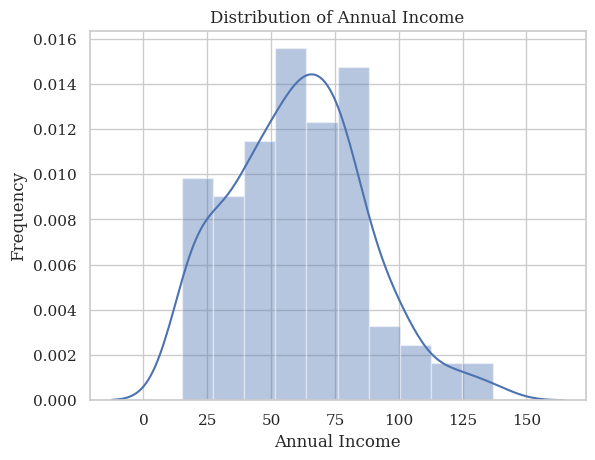

In [121]:
plt.figure()
sns.distplot(records['income'], color='b')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

/var/folders/rt/4pmvhmbn1mqgy1wn6v12t1xr0000gn/T/ipykernel_53098/2391371798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(records['age'], color='b')


Text(0, 0.5, 'Frequency')

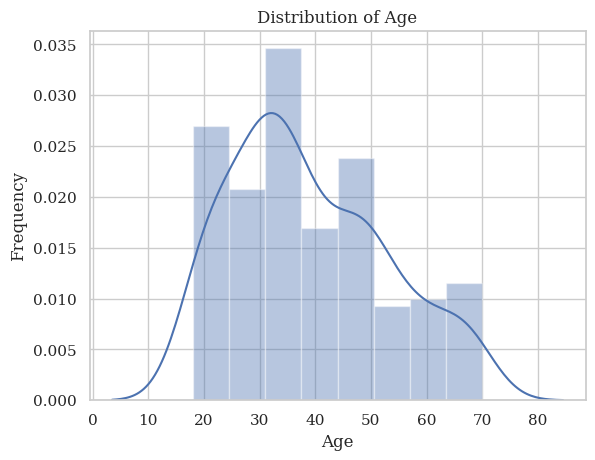

In [122]:
plt.figure()
sns.distplot(records['age'], color='b')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

/var/folders/rt/4pmvhmbn1mqgy1wn6v12t1xr0000gn/T/ipykernel_53098/192815303.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(records['score'], color='b')


Text(0, 0.5, 'Frequency')

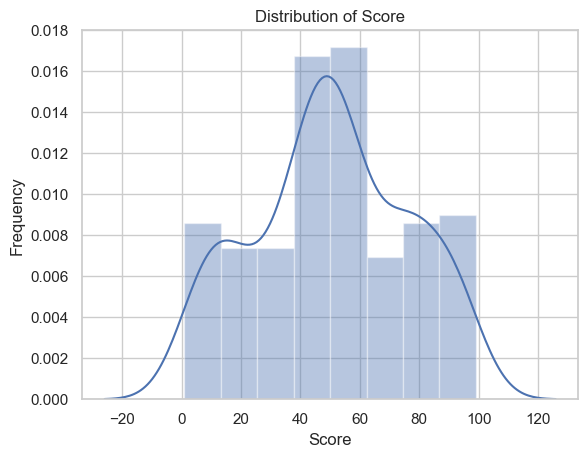

In [123]:
plt.figure()
sns.set(style = 'whitegrid')
sns.distplot(records['score'], color='b')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

<Axes: xlabel='sex'>

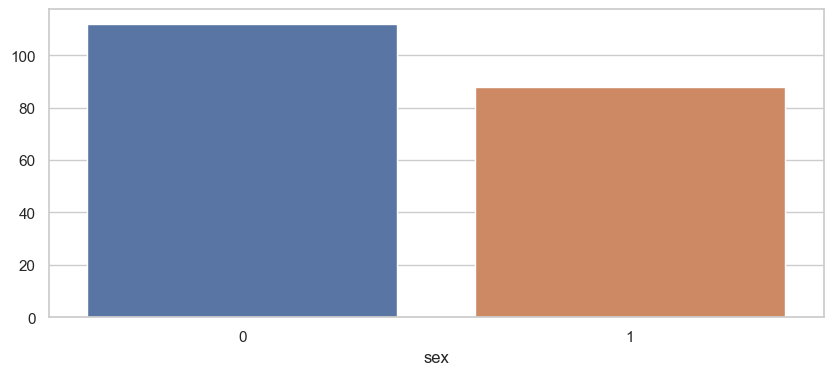

In [124]:
genders = records.sex.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)

In [125]:
df = records[['id','sex','age','income','score']]

SvI=records[['income','score']]
SvA=records[['score','age']]
AvI=records[['age','income']]

#### Scatterplot 

Text(0.5, 1.0, 'Spending Score vs Age')

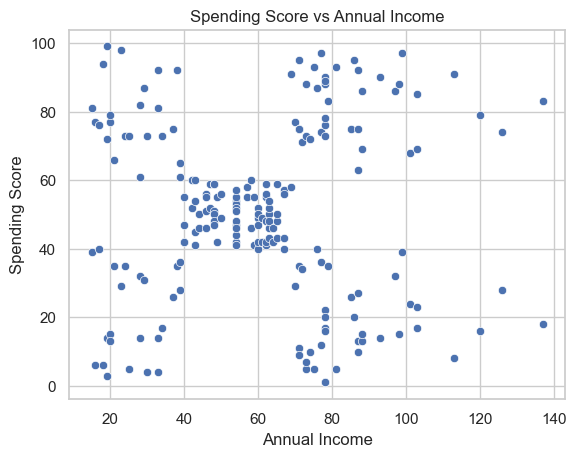

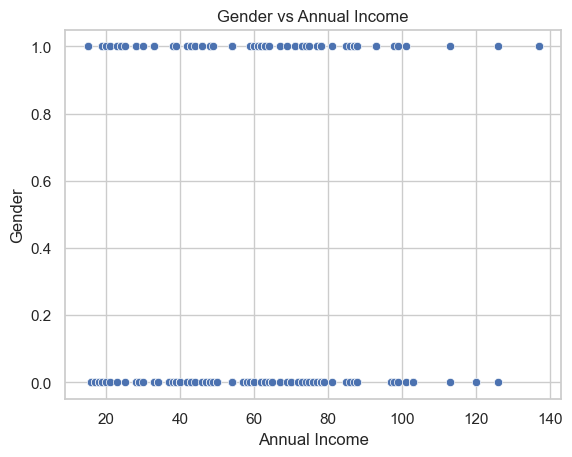

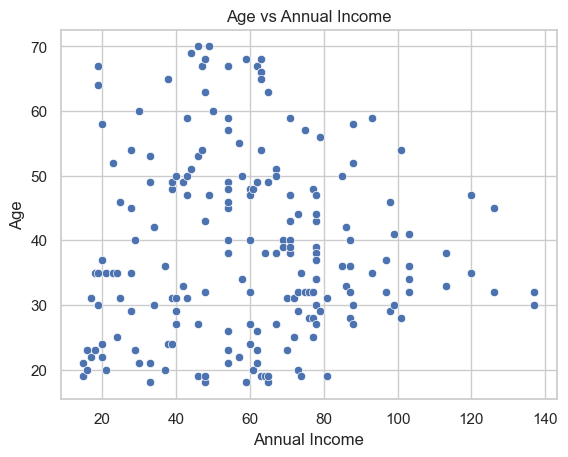

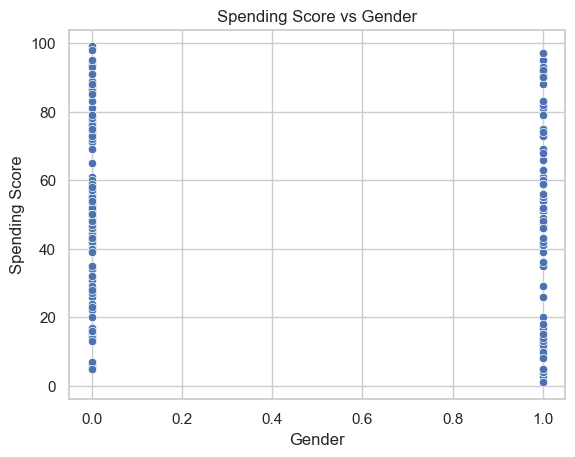

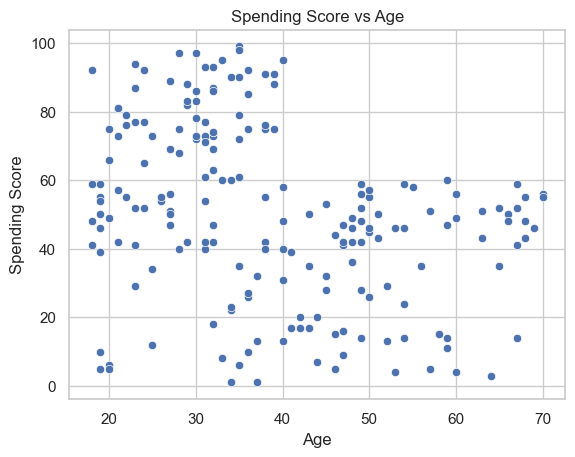

In [126]:
plt.figure()
sns.scatterplot(x = 'income',y = 'score',  data = df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Annual Income')

plt.figure()
sns.scatterplot(x = 'income',y = 'sex',  data = df)
plt.xlabel('Annual Income')
plt.ylabel('Gender') 
plt.title('Gender vs Annual Income')

plt.figure()
sns.scatterplot(x = 'income',y = 'age',  data = df)
plt.xlabel('Annual Income')
plt.ylabel('Age') 
plt.title('Age vs Annual Income')

plt.figure()
sns.scatterplot(x = 'sex',y = 'score',  data = df)
plt.xlabel('Gender')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Gender')

plt.figure()
sns.scatterplot(x = 'age',y = 'score',  data = df)
plt.xlabel('Age')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Age')

### k-Means Clustering

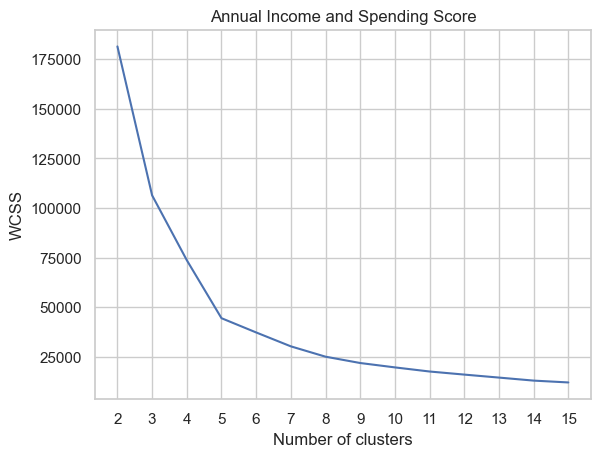

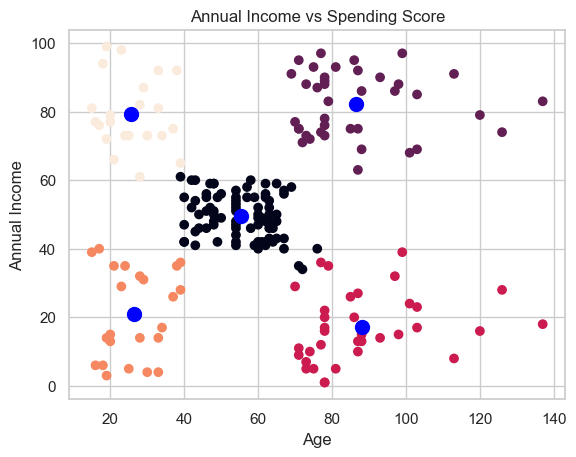

In [127]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare your data
X = df[['income', 'score']]

wcss = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2,16), wcss)
plt.title('Annual Income and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.xticks(np.arange(2,16, step=1))
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Plot the clusters
plt.figure()
plt.scatter(X['income'], X['score'], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue')
plt.xlabel('Age')
plt.ylabel('Annual Income') 
plt.title('Annual Income vs Spending Score')
plt.show()



#### From above plot we can see that there are 5 clusters in the data which we can clearly learn from the elbow method.

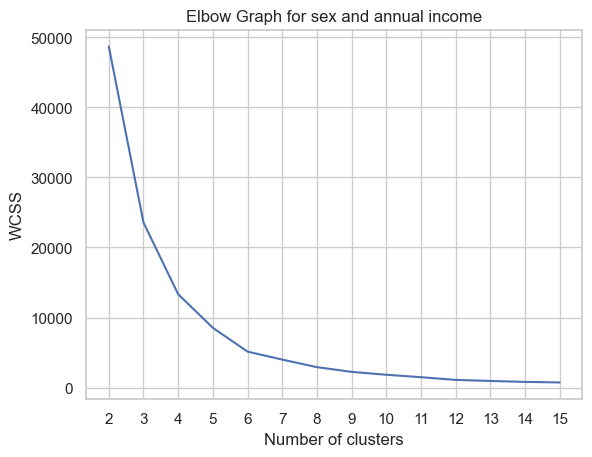

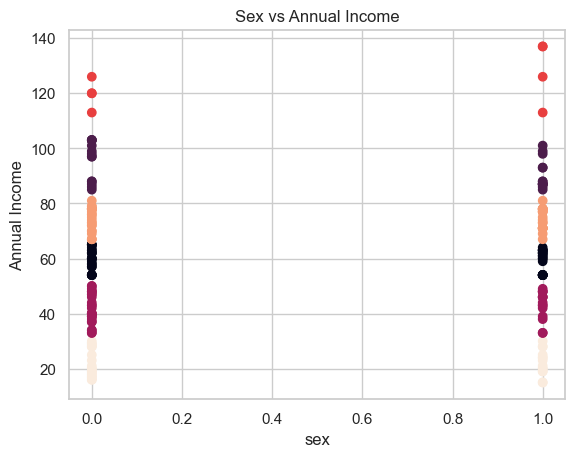

In [128]:
X = df[['sex', 'income']]
wcss = []

wcss = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2,16), wcss)
plt.title('Elbow Graph for sex and annual income')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.xticks(np.arange(2,16, step=1))
plt.show()

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X['sex'], X['income'], c=pred_y)
plt.xlabel('sex')
plt.ylabel('Annual Income')
plt.title('Sex vs Annual Income')
plt.show()



#### Here we can observe that there isn't any clear elbow point for sex vs annual income but we can see that the slope of the line is decreasing after 6. So we can say that the optimal number of clusters is 6.

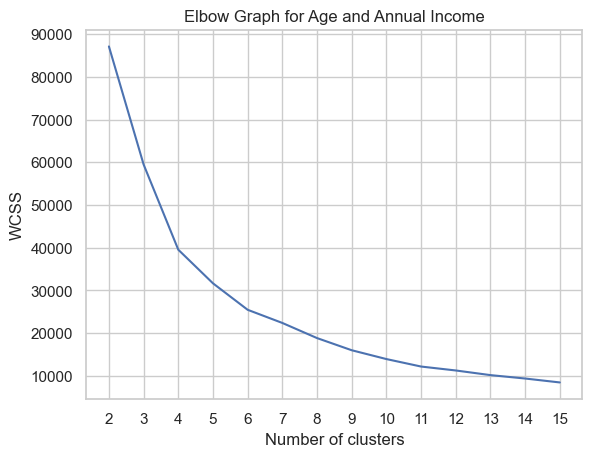

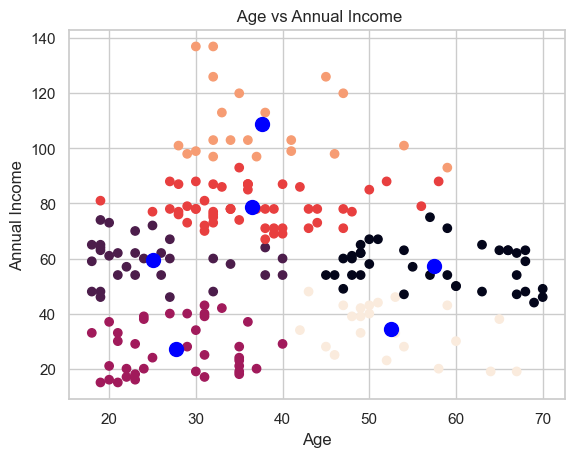

In [131]:
X = df[['age', 'income']]

wcss = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2,16), wcss)
plt.title('Elbow Graph for Age and Annual Income')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.xticks(np.arange(2,16, step=1))
plt.show()

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X['age'], X['income'], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue')
plt.xlabel('Age')
plt.ylabel('Annual Income') 
plt.title(' Age vs Annual Income')
plt.show()



#### For age vs annual income we can see that the elbow point is at 6 so we can say that the optimal number of clusters is 6.

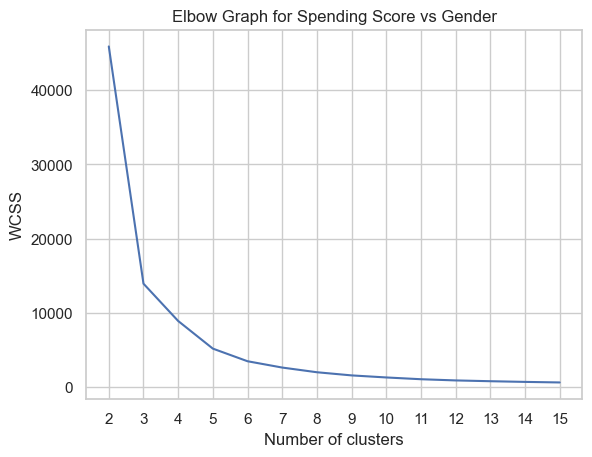

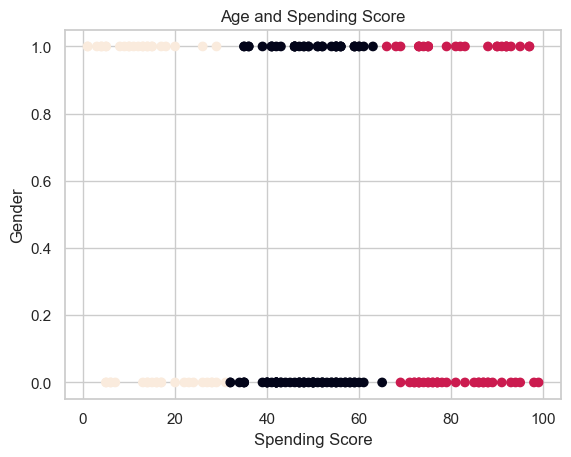

In [139]:
X = df[['score','sex']]

wcss = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2,16), wcss)
plt.title('Elbow Graph for Spending Score vs Gender')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.xticks(np.arange(2,16, step=1))
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.figure()
plt.scatter( X['score'],X['sex'],  c=pred_y)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue')
plt.ylabel('Gender') 
plt.xlabel('Spending Score')
plt.title('Age and Spending Score')
plt.show()



### For age vs spending score we can see that the elbow point is at 3 so we can say that the optimal number of clusters is 3.

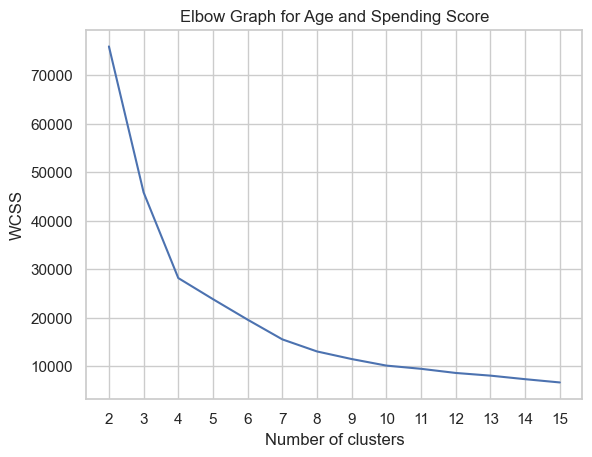

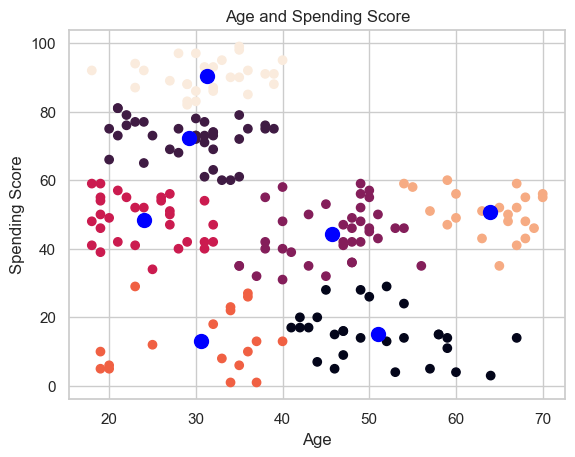

In [132]:
X = df[['age','score']]

wcss = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2,16), wcss)
plt.title('Elbow Graph for Age and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.xticks(np.arange(2,16, step=1))
plt.show()

kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.figure()
plt.scatter( X['age'],X['score'],  c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue')
plt.ylabel('Spending Score') 
plt.xlabel('Age')
plt.title('Age and Spending Score')
plt.show()



#### For age vs spending score we can see that the elbow point is at 7 so we can say that the optimal number of clusters is 7.